# Pandas

## Как загружать файлы в Colab

Для работы с файлами в Google Colab их сначала необходимо загрузить в облачное хранилище Colab.

**!При новом запуске Colab файлы нужно заново подгружать, так как Colab обладает буферной памятью.**

Возьмём для **примера 1** задачу ЕГЭ на работу с таблицами:

https://inf-ege.sdamgia.ru/problem?id=63025

Скачаем отсюда файл excel с табличными данными.

Для **примера 2** возьмем файл с платформы kaggle  с табличными данными:

https://www.kaggle.com/competitions/passenger-satisfaction/data

### Инструкция:

Загрузить данные можно на панеле слева:

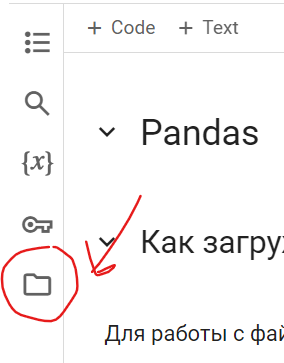

Далее выбираем "Upload files"

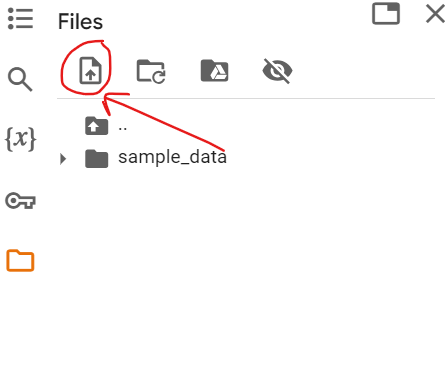

Выбираем файл с комьютера и загружаем.

## Импорт данных

Для создания DataFrame можно использовать внешние данные, например из файлов .csv или  .xlsx.

**CSV** (Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных.

Каждая строка - это отдельная строка таблицы, а столбцы отделены один от другого специальными символами - разделителями (например, запятой).

Для загрузки .csv файла с данными в pandas используется функция **read_csv()**.

У функции есть ряд ключевых параметров:
- filepath_or_buffer - путь к файлу, который необходимо считать
- sep - Используемый разделитель

По умолчанию предполагается, что поля разделены запятыми.

In [ ]:
import pandas as pd

df = pd.read_csv("pass_satisfaction_train.csv")

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,110028,0,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
1,24026,0,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
2,111157,0,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
3,82113,1,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
4,79485,0,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied


Существует анологичная функция для чтения данных с Excel.

In [ ]:
import pandas as pd

df2 = pd.read_excel("09.xlsx", header=None)

df2.head()

,0,1,2,3,4,5
0,35,33,13,5,98,6
1,42,37,34,98,5,51
2,36,12,47,56,97,60
3,76,72,3,48,8,79
4,30,99,41,92,73,14


## Работа с DataFrame

In [ ]:
df2.head(3)

,0,1,2,3,4,5
0,35,33,13,5,98,6
1,42,37,34,98,5,51
2,36,12,47,56,97,60


In [ ]:
df2.shape

(16000, 6)

In [ ]:
df2.max() # нашел максимум в каждом столбце
# по дефолту DataFrame всегда работает со столбцами!
# т.е. axis всегда установлен в 1 (axis=1)

0    99
1    99
2    99
3    99
4    99
5    99
dtype: int64

In [ ]:
df2.max(axis=1) # нашел максимум в каждой строке

0        98
1        98
2        97
3        79
4        99
         ..
15995    79
15996    78
15997    87
15998    99
15999    89
Length: 16000, dtype: int64

In [ ]:
df2.mean(axis=0) # нашел среднее в каждом столбце

0    50.160063
1    50.029500
2    49.908875
3    49.843875
4    49.901625
5    49.807125
dtype: float64

In [ ]:
df.info() # подробная информация о DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 29568 non-null  int64  
 1   Gender                             29568 non-null  int64  
 2   Customer Type                      29568 non-null  object 
 3   Age                                29568 non-null  int64  
 4   Type of Travel                     29568 non-null  object 
 5   Class                              29568 non-null  object 
 6   Flight Distance                    29568 non-null  int64  
 7   Inflight wifi service              29568 non-null  int64  
 8   Departure/Arrival time convenient  29568 non-null  int64  
 9   Ease of Online booking             29568 non-null  int64  
 10  Gate location                      29568 non-null  int64  
 11  Food and drink                     29568 non-null  int

In [ ]:
# поиск дубликатов по всем столбцам
duplicateRows = df[df.duplicated()]

# поиск дубликатов по определенным столбцам
duplicateRows = df[df.duplicated(['col1', 'col2'])]

In [ ]:
print(df.columns) # возвращает названия колонок

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [ ]:
print(df2.columns) # возвращает названия колонок

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


### Группировка данных

Одна из базовых функций анализа данных - группировка и агрегирование.

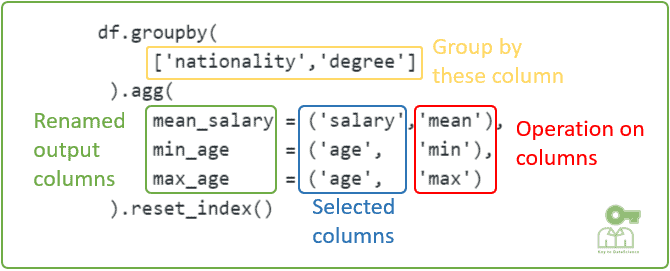

In [ ]:
df.groupby(['Gender']).agg({'Age': 'mean'})

,Age
Gender,
0,39.249933
1,39.215366


In [ ]:
df.groupby(['Gender', 'Customer Type']).agg({'Age': 'mean'})

Age
Gender Customer Type               
0      Loyal Customer     41.350813
       disloyal Customer  30.498796
1      Loyal Customer     41.143415
       disloyal Customer  29.965339

In [ ]:
df.groupby(['Gender']).agg({'Age': ['mean', 'min', 'max']})

Age        
             mean min max
Gender                   
0       39.249933   7  85
1       39.215366   7  85

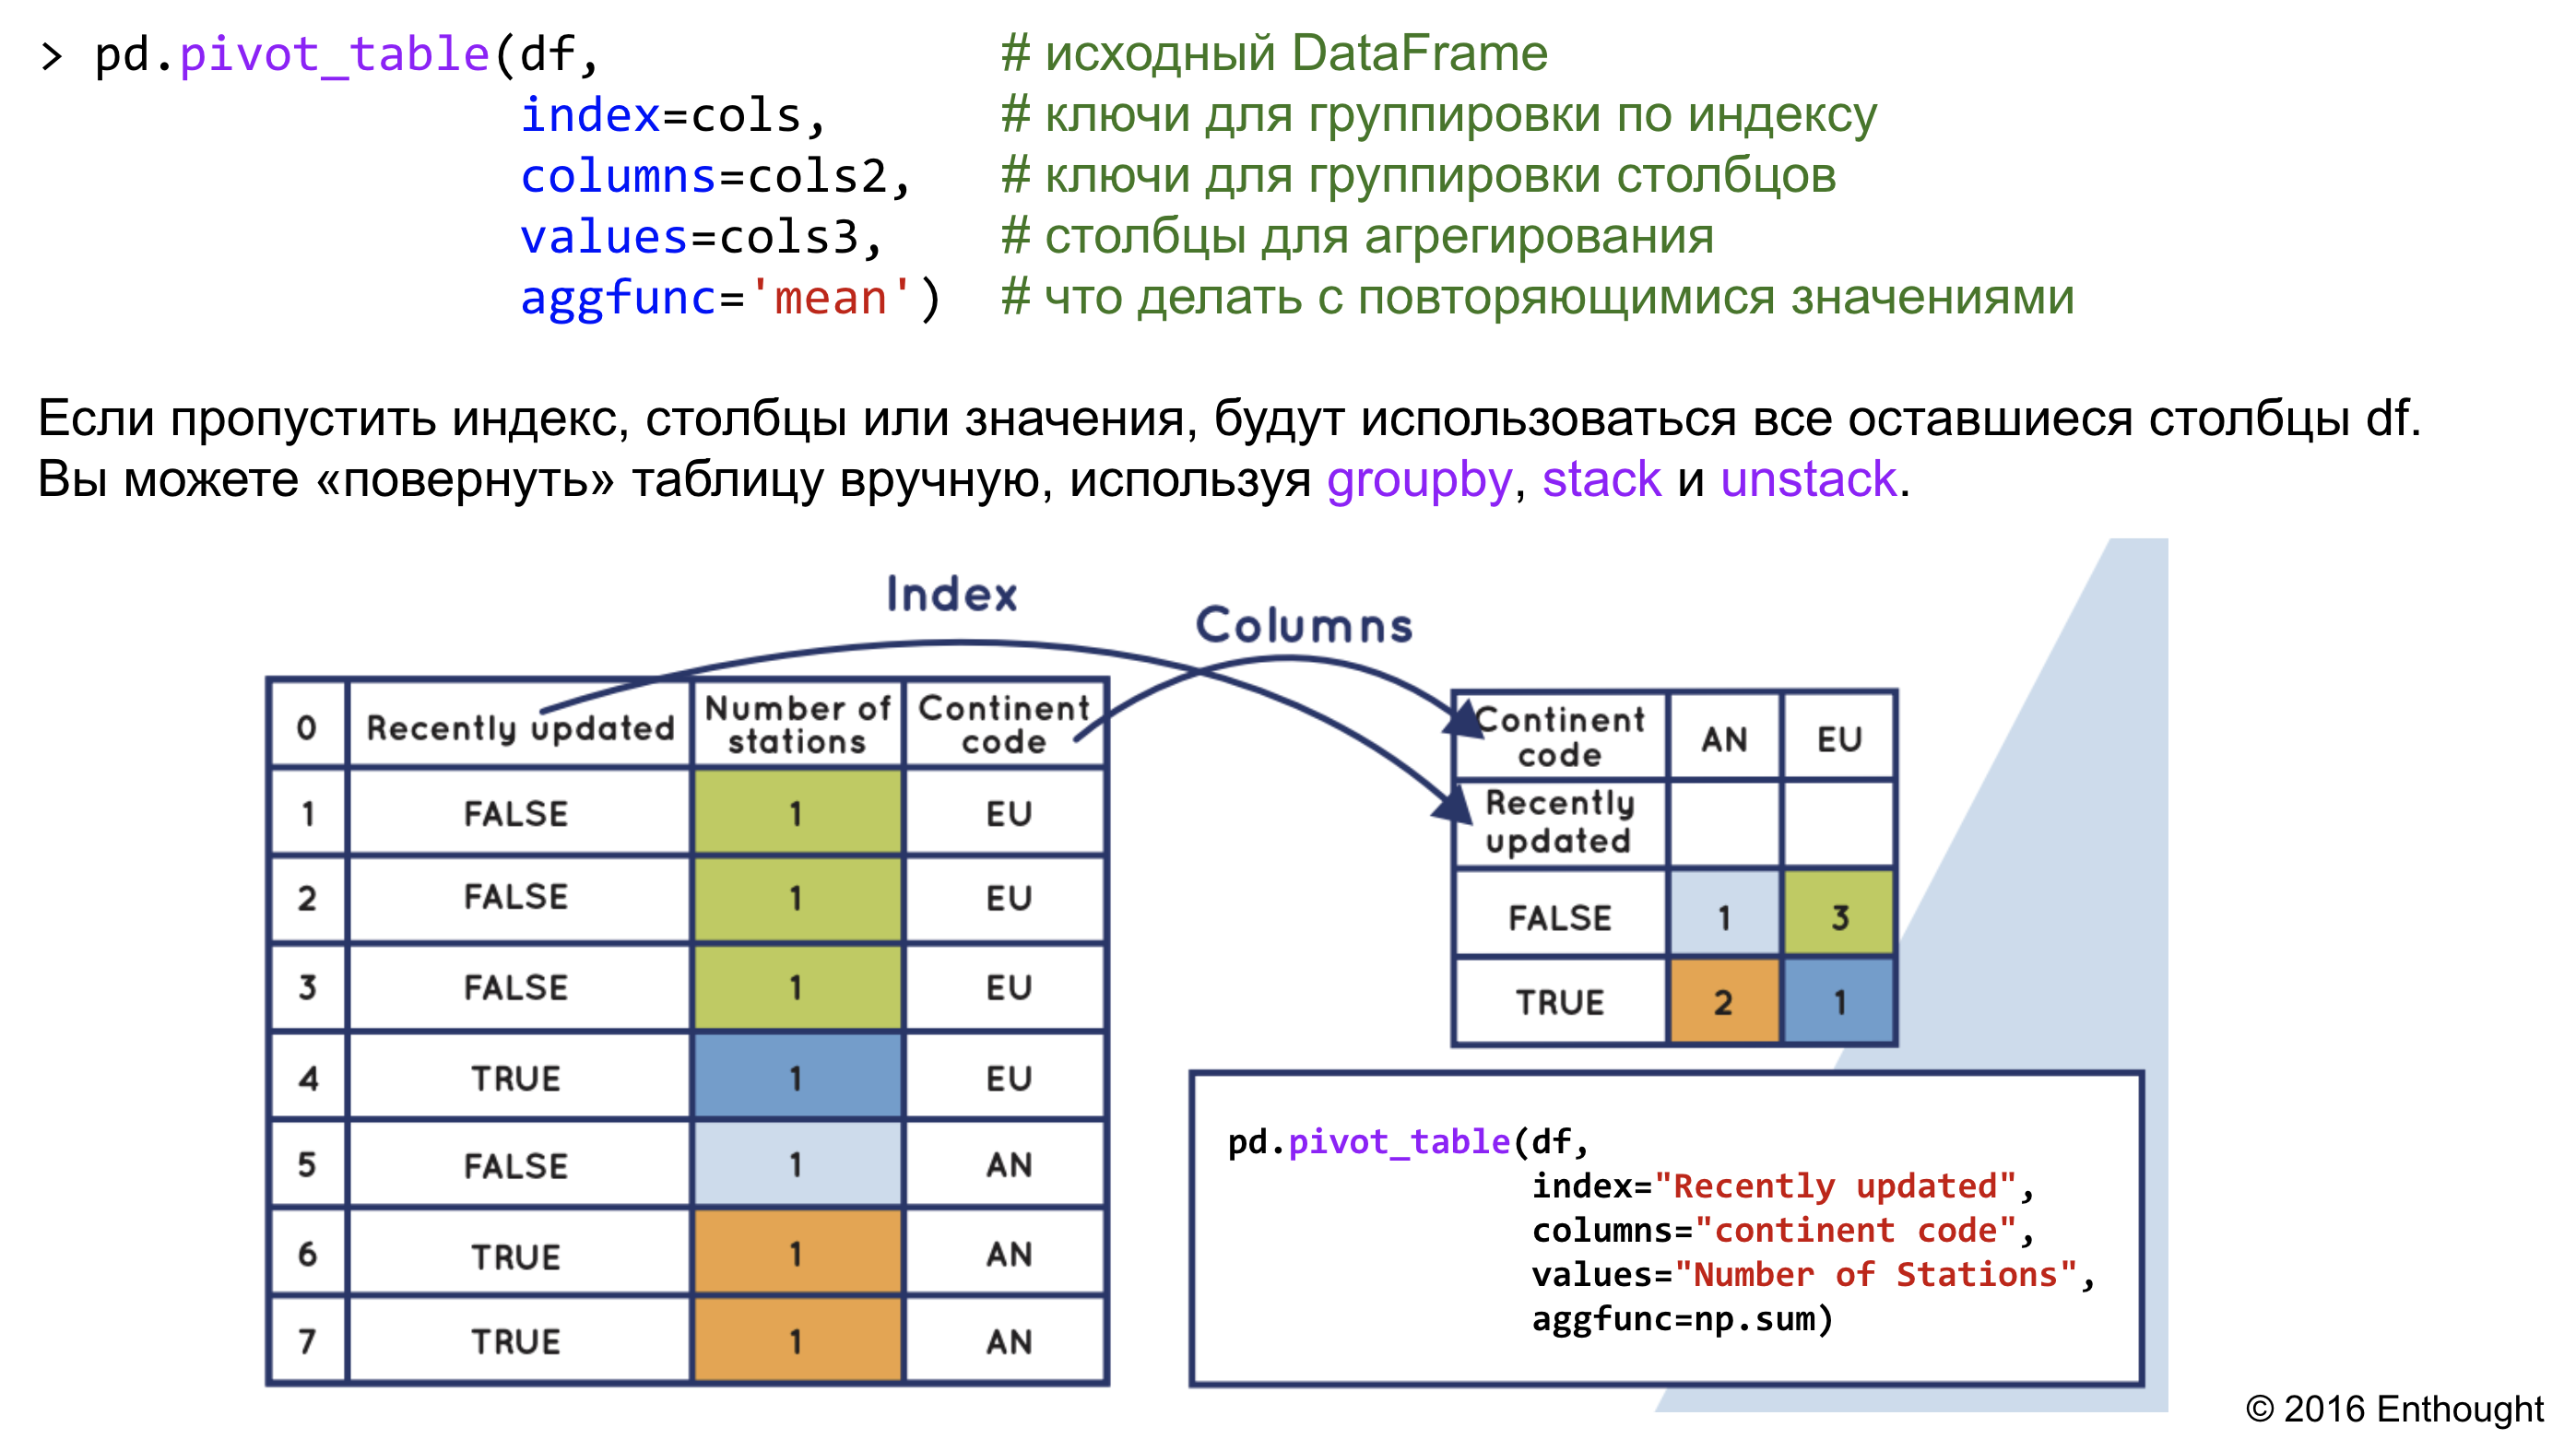

В Pandas есть функция DataFrame.pivot_table(), которая позволяет быстро преобразовать DataFrame в сводную таблицу

In [ ]:
# df.groupby(['Gender']).agg({'Age': 'mean'})
df.pivot_table(index=['Gender'], values='Age', aggfunc=['mean', 'min'])

,Age
Gender,
0,39.249933
1,39.215366


### Уникальные значения

In [ ]:
df.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,110028,0,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
1,24026,0,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied


In [ ]:
df['Gender'].unique()

array([0, 1])

In [ ]:
df['Gender'].value_counts()

0    15016
1    14552
Name: Gender, dtype: int64

### Методы `loc` и `iloc`

Также для работы со строками и столбцами существуют методы:

**DataFrame.loc[]**- Доступ к группе строк и столбцов (или только к столбцам, или только к строкам) по меткам или логическому массиву.

Допустимые входы:
- Одиночная метка, например 5 или 'a', (обратите внимание, что 5 - интерпретируется как метка индекса, а не как целочисленная позиция по индексу).
- Список или массив меток, например ['a', 'b', 'c']
- Объект среза с метками, например 'a':'f'.

**DataFrame.iloc[]** - позволяет получить доступ к элементам DataFrame по целочисленном индексам.

Допустимые входы:
- Целое число, например 5.
- Список или массив целых чисел, например .[4, 3, 0]
- Объект среза с целыми числами, например 1:7.

In [ ]:
df.iloc[9,1]

0

In [ ]:
df.loc[9,'Gender']

0

In [ ]:
df.loc[df['Gender']==0, 'Age']

0        28
1        27
2        28
4        43
6        26
         ..
29558    25
29559    75
29561    32
29564    60
29565    48
Name: Age, Length: 15016, dtype: int64

In [ ]:
print(df.loc[df['Gender']==0, 'Age'].mean())
print(df.loc[df['Gender']==1, 'Age'].mean())

39.27050270835313
39.51546391752577


In [ ]:
df.groupby(['Gender']).agg({'Age': 'mean'})

,Age
Gender,
0,39.270503
1,39.515464


In [ ]:
df.loc[(df['Gender']==1) & (df['Class']=='Business')]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
11,127461,1,Loyal Customer,43,Business travel,Business,2075,4,4,2,...,5,5,5,5,3,5,5,0,10.0,satisfied
26,58779,1,disloyal Customer,39,Business travel,Business,1182,3,3,3,...,1,4,1,3,1,4,1,9,0.0,neutral or dissatisfied
31,64685,1,disloyal Customer,43,Business travel,Business,354,1,1,1,...,1,3,3,4,4,4,1,0,0.0,neutral or dissatisfied
32,64138,1,Loyal Customer,41,Business travel,Business,1734,4,4,4,...,4,4,4,4,4,4,3,0,0.0,satisfied
34,14849,1,Loyal Customer,43,Business travel,Business,296,0,0,0,...,4,4,4,4,4,4,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29547,10510,1,Loyal Customer,35,Business travel,Business,2337,5,5,3,...,4,4,5,5,3,5,4,68,61.0,satisfied
29554,37276,1,Loyal Customer,43,Business travel,Business,2178,3,3,3,...,5,5,5,5,1,5,3,0,0.0,satisfied
29555,48805,1,Loyal Customer,31,Personal Travel,Business,190,3,4,3,...,3,5,4,5,3,5,3,89,111.0,neutral or dissatisfied
29560,109778,1,Loyal Customer,44,Business travel,Business,3697,5,5,5,...,5,5,5,5,4,5,4,7,0.0,satisfied


### Метод apply

В процессе обработки и анализа данных их значения могут преобразовываться. При этом можно оперировать с конкретными элементами или же применять действия одновременно ко всем в столбце или строке. Последний вариант является более предпочтительным в использовании, так как увеличивает производительность при обработке больших объемов данных.

In [ ]:
# Функция для увеличения возраста на 1
def increase_age(x):
   return x + 1

# Применение функции к столбцу 'age'
df['Age'] = df['Age'].apply(increase_age)
# df['Age'] = df['Age'] + 1 - эквивалент

In [ ]:
df['Age'].min()

8

### Лямбда-функции

Лямбда-функции в Python являются анонимными. Это означает, что функция безымянна. Как известно, ключевое слов def используется в Python для определения обычной функции. В свою очередь, ключевое слово  lambda  используется для определения анонимной функции.

`Lambda аргументы: выражение`

In [ ]:
double = lambda x: x*2
double

В выше указанном коде `lambda x: x*2` — это лямбда-функция. Здесь `x` — это аргумент, а `x*2` — это выражение, которое вычисляется и возвращается.

In [ ]:
# Эквивалент
def double(x):
		return x * 2

### Лямбда-функции и функции высшего порядка

Мы используем лямбда-функцию, когда нам ненадолго требуется безымянная функция.

В Python мы часто используем их как аргумент функции высшего порядка (функции, которая принимает другие функции в качестве аргументов).  Лямбда-функции используют вместе с такими встроенными функциями как `filter()`, `map()`, `reduce()`, `apply()` и др.

In [ ]:
df['Age'] = df['Age'].apply(lambda x: x+1)

In [ ]:
# эквивалент

for index, row in df.iterrows():
    df.loc[index, 'Age'] = row['Age'] + 1

# другой эквивалент
df['Age'] = df['Age'] + 1

## Задача

Откройте файл электронной таблицы, содержащей в каждой строке шесть натуральных чисел.

Определите количество строк таблицы, для чисел которых одновременно выполнены все следующие условия:

— в строке есть повторяющиеся числа;

— максимальное число в строке не повторяется;

— сумма всех повторяющихся чисел в строке больше максимального числа этой строки. При подсчёте суммы повторяющихся чисел каждое число учитывается столько раз, сколько оно встречается.

В ответе запишите число  — количество строк, удовлетворяющих заданным условиям.

In [ ]:
df2.head()

,0,1,2,3,4,5
0,35,33,13,5,98,6
1,42,37,34,98,5,51
2,36,12,47,56,97,60
3,76,72,3,48,8,79
4,30,99,41,92,73,14


In [ ]:
df2.loc[0].duplicated().any()

False

In [ ]:
df2.apply(lambda x: x.duplicated().any(), axis=1).sum()

2278

In [ ]:
df2.loc[df2.apply(lambda x: x.duplicated().any(), axis=1)] # в строке есть повторяющиеся числа

,0,1,2,3,4,5
5,5,2,12,12,84,54
8,9,64,88,9,68,18
15,65,13,29,20,35,35
29,46,64,45,45,4,84
30,83,71,25,83,30,20
...,...,...,...,...,...,...
15976,17,97,98,29,29,48
15982,46,25,5,64,91,46
15984,99,73,42,94,73,88
15988,28,11,52,15,52,65


In [ ]:
x.eq(x.max()) # eq - equal - равный

46	95	78	46	54	94

False True False False True False

In [ ]:
df2.loc[~df2.apply(lambda x: x.eq(x.max()).sum() > 1, axis=1)]

,0,1,2,3,4,5
0,35,33,13,5,98,6
1,42,37,34,98,5,51
2,36,12,47,56,97,60
3,76,72,3,48,8,79
4,30,99,41,92,73,14
...,...,...,...,...,...,...
15995,33,25,45,21,79,37
15996,31,41,78,24,55,67
15997,1,42,45,87,23,29
15998,4,27,65,80,78,99


In [ ]:
df2.loc[~df2.apply(lambda x: x.eq(x.max()).sum() > 1, axis=1)]
# максимальное число в строке не повторяется

,0,1,2,3,4,5
0,35,33,13,5,98,6
1,42,37,34,98,5,51
2,36,12,47,56,97,60
3,76,72,3,48,8,79
4,30,99,41,92,73,14
...,...,...,...,...,...,...
15995,33,25,45,21,79,37
15996,31,41,78,24,55,67
15997,1,42,45,87,23,29
15998,4,27,65,80,78,99


In [ ]:
df2.loc[df2.apply(lambda x: x[x.duplicated()].sum(), axis=1) > df2.max(axis=1)]

# сумма всех повторяющихся чисел в строке больше максимального числа этой строки.
# При подсчёте суммы повторяющихся чисел каждое число учитывается столько раз, сколько оно встречается.

In [ ]:
# Проверка условий для каждой строки и подсчет количества строк, удовлетворяющих условиям
count = ((df2.apply(lambda x: x.duplicated().any(), axis=1)) &
         (~df2.apply(lambda x: x.eq(x.max()).sum() > 1, axis=1)) &
         (df2.apply(lambda x: x[x.duplicated()].sum(), axis=1) > df2.max(axis=1))).sum()

print("Количество строк, удовлетворяющих заданным условиям:", count)

## Экспорт данных

DataFrame и Series можно сохранять в виде файлов .csv и .xlsx

`DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)`

- path_or_buf - пусть к файлу
- sep - Строка длиной 1. Разделитель полей для выходного файла.

Чтобы записать отдельный объект в файл Excel .xlsx, необходимо только указать имя целевого файла. Для записи на несколько листов необходимо создать объект ExcelWriter с именем целевого файла и указать лист в файле для записи.

`DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None, storage_options=None)`

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df.to_csv("my.csv")
df.to_excel("my_excel.xlsx")